Data loading, pre-processing and representation
---



In [ ]:
#adding libraries
from sklearn import linear_model  
from sklearn.linear_model import LinearRegression  
import csv          
import requests     
import numpy as np  
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import metrics

In [ ]:
#accessing the dataset file stored in the Google drive
from google.colab import drive
drive.mount('/content/gdrive')
import os
os.chdir("/content/gdrive/MyDrive/Colab Notebooks")
!ls
#Reading the dataset file
my_dataset = pd.read_csv('penguins_size.csv')
#Representing datatypes of the dataset columns
print(my_dataset.dtypes) 

Mounted at /content/gdrive
 1_Mājas_Darbs_
 2_Mājas_Darbs
 2_Mājas_darbs_papildinājums
 3_Mājas_Darbs
 4_Mājas_darbs
 5_Mājas_darbs
'Copy of 01-data-exploration.ipynb'
 dataset_painted.csv
'Datu izpēte'
 Demonstration_Regression
 Haza.ipynb
 iris.csv
 MD1_Data_exploration_NTNU
 MD2_linear_regression_NTNU
 MD3_unsupervised_learning_NTNU
 MD4_neural_networks_NTNU
'Nepārraudzītā mašīnmācīšanās'
 nt_vizualizacija
'Pārraudzītā mašīnmācīšanās'
 Patstavigais_2_nodarbiba
 Patstavigais_darbs_07_04_2022
 penguins_size.csv
 PR2_Demo
 RealEstate.csv
 singles.txt
 TemperatureAnomaly.csv
 Temperatures.csv
 Unsupervised_demonstration
 visualize-neural-network
 wine.txt
'Копия блокнота "1_Mājas_Darbs_"'
'Копия блокнота "Bonuss_P2_3_Regresija_un_Klasterizācija.ipynb"'
'Копия блокнота "P1_IevadsColabNotebook.ipynb"'
'Копия блокнота "P2_LinearaRegresija_Uzdevumi.ipynb"'
'Копия блокнота "P5_NeironuTIkli_Uzdevumi.ipynb"'
species               object
island                object


### Datatype matching

In [ ]:
#Since categorical attributes are specified as "object", their type is changed to "category"
my_dataset["species"] = my_dataset["species"].astype('category')
my_dataset["island"] = my_dataset["island"].astype('category')
my_dataset["sex"] = my_dataset["sex"].astype('category')
#New columns are created for categorical attributes and their values are converted to numeric values
my_dataset["species_cat"] = my_dataset["species"].cat.codes
my_dataset["island_cat"] = my_dataset["island"].cat.codes
my_dataset["sex_cat"] = my_dataset["sex"].cat.codes
#Representing datatypes of the dataset columns
print(my_dataset.dtypes) 

species              category
island               category
culmen_length_mm      float64
culmen_depth_mm       float64
flipper_length_mm     float64
body_mass_g           float64
sex                  category
species_cat              int8
island_cat               int8
sex_cat                  int8
dtype: object


###Representing and analysing data about the dataset

In [ ]:
#Columns of the category type are discarded for further work
my_reduced_dataset = my_dataset[["culmen_length_mm","culmen_depth_mm","flipper_length_mm","body_mass_g","species_cat","island_cat","sex_cat"]]
#Dataset data are displayed
print(my_reduced_dataset.describe())
print(my_reduced_dataset.info()) 

       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
count        342.000000       342.000000         342.000000   342.000000   
mean          43.921930        17.151170         200.915205  4201.754386   
std            5.459584         1.974793          14.061714   801.954536   
min           32.100000        13.100000         172.000000  2700.000000   
25%           39.225000        15.600000         190.000000  3550.000000   
50%           44.450000        17.300000         197.000000  4050.000000   
75%           48.500000        18.700000         213.000000  4750.000000   
max           59.600000        21.500000         231.000000  6300.000000   

       species_cat  island_cat     sex_cat  
count   344.000000  344.000000  344.000000  
mean      0.918605    0.662791    1.427326  
std       0.893320    0.726194    0.652832  
min       0.000000    0.000000   -1.000000  
25%       0.000000    0.000000    1.000000  
50%       1.000000    1.000000    1.000000  


You can see above that there are two data objects in the dataset with missing values for the attributes "culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g". To obtain the values, we replace the missing values by the mean value of the attribute


###Replacing missing values

In [ ]:
#Replacing missing values with average values
my_working_dataset=my_reduced_dataset.copy()
my_working_dataset['culmen_length_mm']=my_working_dataset['culmen_length_mm'].fillna(my_working_dataset['culmen_length_mm'].mean())
my_working_dataset['culmen_depth_mm']=my_working_dataset['culmen_depth_mm'].fillna(my_working_dataset['culmen_depth_mm'].mean())
my_working_dataset['flipper_length_mm']=my_working_dataset['flipper_length_mm'].fillna(my_working_dataset['flipper_length_mm'].mean())
my_working_dataset['body_mass_g']=my_working_dataset['body_mass_g'].fillna(my_working_dataset['body_mass_g'].mean())
#Dataset data are displayed
print(my_working_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   344 non-null    float64
 1   culmen_depth_mm    344 non-null    float64
 2   flipper_length_mm  344 non-null    float64
 3   body_mass_g        344 non-null    float64
 4   species_cat        344 non-null    int8   
 5   island_cat         344 non-null    int8   
 6   sex_cat            344 non-null    int8   
dtypes: float64(4), int8(3)
memory usage: 11.9 KB
None


In [ ]:
#For attributes of categorical type, the values are checked against possible values
print(my_working_dataset['island_cat'].value_counts())
print(my_working_dataset['species_cat'].value_counts())
print(my_working_dataset['sex_cat'].value_counts())

0    168
1    124
2     52
Name: island_cat, dtype: int64
0    152
2    124
1     68
Name: species_cat, dtype: int64
 2    168
 1    165
-1     10
 0      1
Name: sex_cat, dtype: int64


In [ ]:
#Unknown values of the attribute "sex_cat" are marked with 0 to separate all unknown values in this way
my_working_dataset["sex_cat"].mask(my_working_dataset["sex_cat"] == -1, 0, inplace=True)
print(my_working_dataset['sex_cat'].value_counts())

2    168
1    165
0     11
Name: sex_cat, dtype: int64


###Data normalization

In [ ]:
#Data normalisation is applied for four attributes to make the data more consistent
my_working_dataset['culmen_length_mm']=(my_working_dataset['culmen_length_mm']-my_working_dataset['culmen_length_mm'].min())/(my_working_dataset['culmen_length_mm'].max()-my_working_dataset['culmen_length_mm'].min())
my_working_dataset['culmen_depth_mm']=(my_working_dataset['culmen_depth_mm']-my_working_dataset['culmen_depth_mm'].min())/(my_working_dataset['culmen_depth_mm'].max()-my_working_dataset['culmen_depth_mm'].min())
my_working_dataset['flipper_length_mm']=(my_working_dataset['flipper_length_mm']-my_working_dataset['flipper_length_mm'].min())/(my_working_dataset['flipper_length_mm'].max()-my_working_dataset['flipper_length_mm'].min())
my_working_dataset['body_mass_g']=(my_working_dataset['body_mass_g']-my_working_dataset['body_mass_g'].min())/(my_working_dataset['body_mass_g'].max()-my_working_dataset['body_mass_g'].min())
print(my_working_dataset.head(10))
print(my_working_dataset.describe())

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0          0.254545         0.666667           0.152542     0.291667   
1          0.269091         0.511905           0.237288     0.305556   
2          0.298182         0.583333           0.389831     0.152778   
3          0.429888         0.482282           0.490088     0.417154   
4          0.167273         0.738095           0.355932     0.208333   
5          0.261818         0.892857           0.305085     0.263889   
6          0.247273         0.559524           0.152542     0.256944   
7          0.258182         0.773810           0.389831     0.548611   
8          0.072727         0.595238           0.355932     0.215278   
9          0.360000         0.845238           0.305085     0.430556   

   species_cat  island_cat  sex_cat  
0            0           2        2  
1            0           2        1  
2            0           2        1  
3            0           2        0  
4            0   

#Data visualisation
---

###Representing feature values

<Axes: >

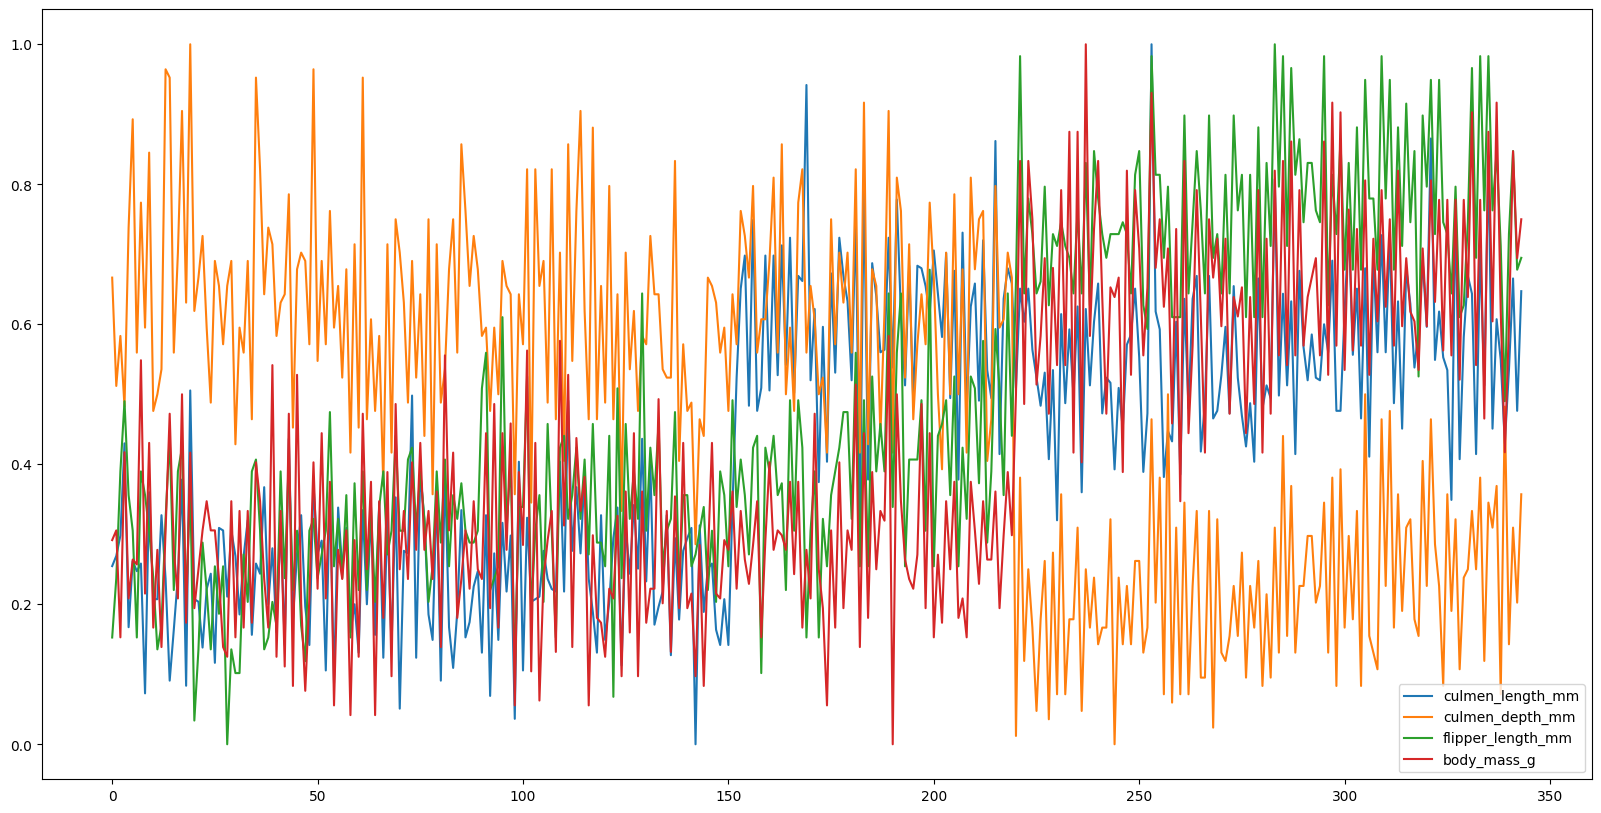

In [ ]:
#Only attributes with numeric values on a continuous scale are selected for value visualisation
data_for_visualisation = my_working_dataset[["culmen_length_mm","culmen_depth_mm","flipper_length_mm","body_mass_g"]]
#Representing values
data_for_visualisation.plot(figsize=(20,10))

The analysis allows making the following conclusions:
- when the culmen depth is greater than 0.4, the culmen length, the flipper length and the body mass decrease (values <0.4)
- when the culmen depth is around 0.5, the culmen length, the flipper length and the body mass are also around the same value (everything merges together)
- when the culmen depth is less than 0.4, the culmen length, the flipper length and the body mass (values >0.4)
- in general, the culmen length, the flipper length and the body mass change together

###Histograms

array([[<Axes: title={'center': 'culmen_length_mm'}>,
        <Axes: title={'center': 'culmen_depth_mm'}>,
        <Axes: title={'center': 'flipper_length_mm'}>],
       [<Axes: title={'center': 'body_mass_g'}>,
        <Axes: title={'center': 'species_cat'}>,
        <Axes: title={'center': 'island_cat'}>],
       [<Axes: title={'center': 'sex_cat'}>, <Axes: >, <Axes: >]],
      dtype=object)

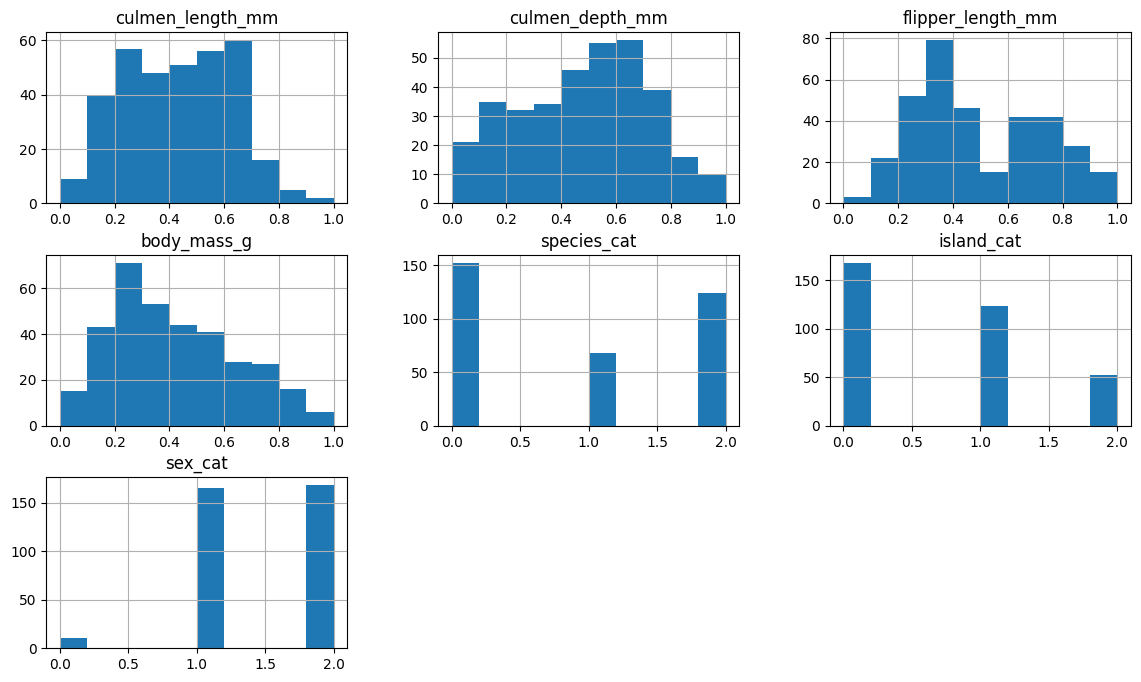

In [ ]:
#Displaying histograms
my_working_dataset.hist(figsize=(14,8))

The histograms show that one of the penguin species is under-represented. This means that the classes available in the dataset are not balanced. The same can be observed for the islands from which the penguins originate: one of them is less represented. In addition, there are more penguins with lower body mass and more penguins with the longest culmen and more penguins with the shortest flipper length in the dataset.

###Scatter plots

Text(0.5, 0.98, 'Feature pairplot')

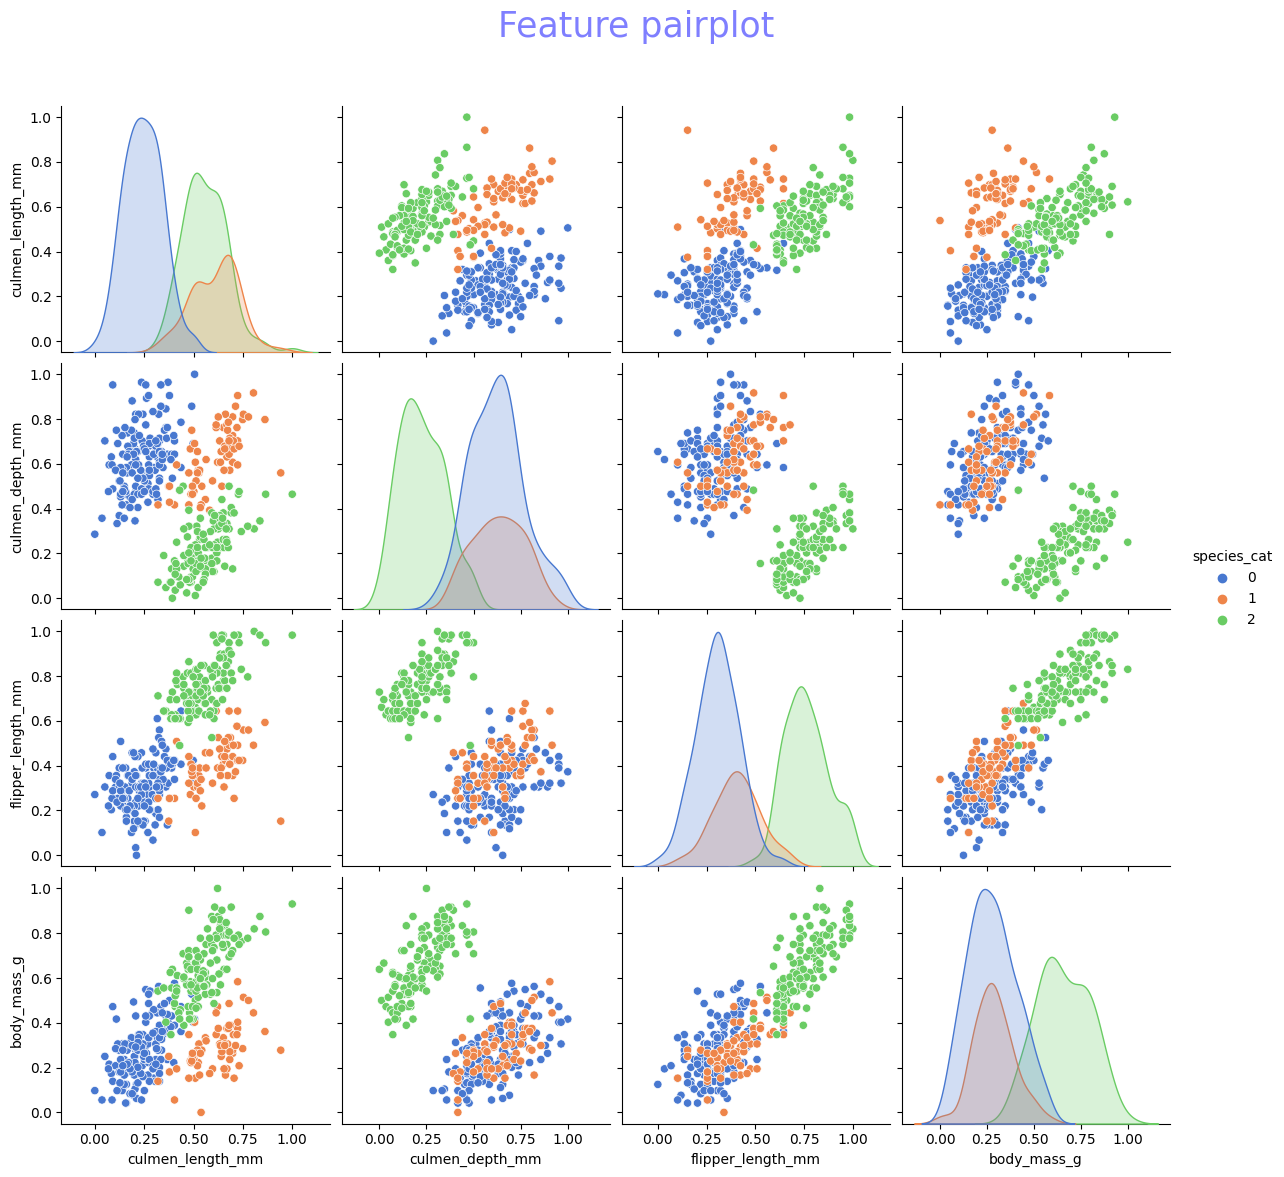

In [ ]:
#Creating a pairplot
my_pairplot = sns.pairplot(my_working_dataset,hue='species_cat',palette="muted",height=3,vars=['culmen_length_mm','culmen_depth_mm','flipper_length_mm', 'body_mass_g'],kind='scatter')
#Extra space to display the title correctly
plt.subplots_adjust(top=0.9)
#Giving a title of the pairplot
my_pairplot.fig.suptitle('Feature pairplot',fontsize=25,color='b',alpha=0.5)

We analyse features relationships based on penguin species. The pairplots suggest that such pairs of features provide reasonably good class separation:
* "culmen_length_mm" and "culmen_depth_mm" 
* "culmen_length_mm" and "flipper_lenght_mm"
and can be used in a classification task.

However, the following pairs of features do not provide good class separation:
* "culmen_length_mm" and "body_mass_g": blue data objects partially merge with green data objects and only orange data objects are well separable
* "culmen_depth_mm" and "flipper_length_mm": blue data objects merge with orange data objects, only green data objects are well separable
* "culmen_depth_mm" and "body_mass_g": blue data objects merge with orange data objects and only green data objects are well separable
* "flipper_length_mm" and "body_mass_g": blue data objects merge with orange data objects and only green data objects are well separable

###Feature correlations

<Axes: >

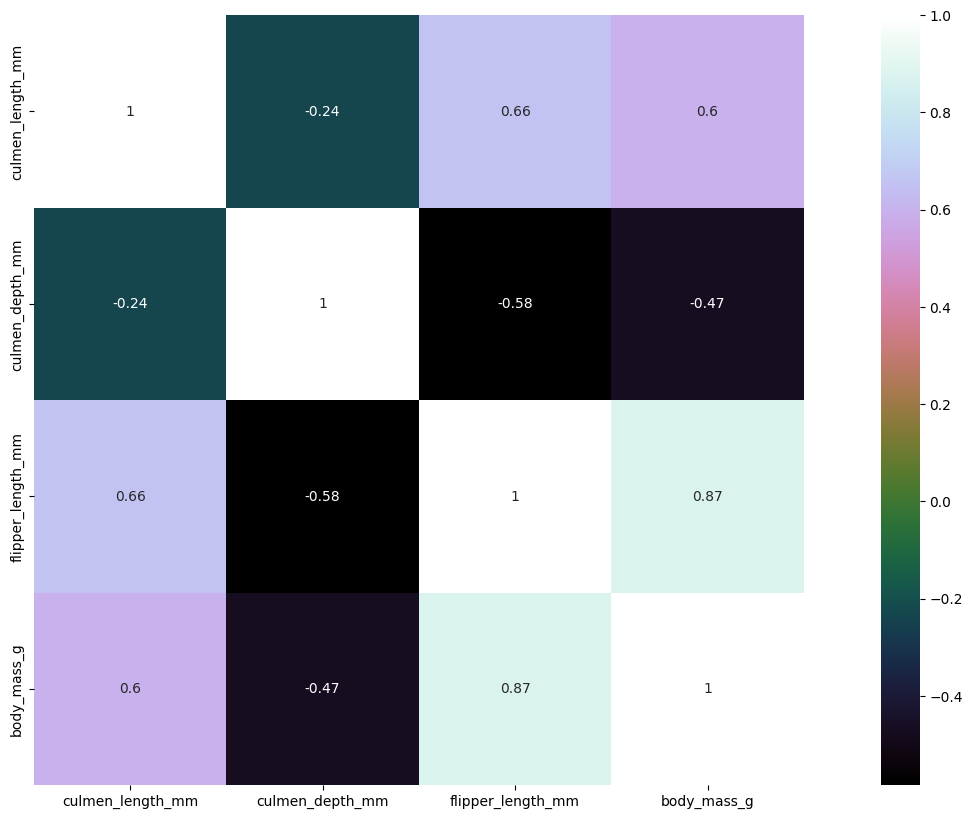

In [ ]:
#A correlation matrix is created, showing the correlation coefficient for the numeric features
my_correlation_matrix=data_for_visualisation.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(my_correlation_matrix,vmax=1,square=True,annot=True,cmap='cubehelix')

The correlation matrix analysis shows that:
* there is a weak negative correlation between the features "culmen_length_mm" and "culmen_depth_mm"
* the feature "culmen_length_mm" has an average positive correlation with the features "flipper_length_mm" and "body_mass_g"
* the feature "culmen_depth_mm" has an average negative correlation with the features "flipper_length_mm" and "body_mass_g"
* there is a high positive correlation between the features "flipper_length_mm" and "body_mass_g"

Thus, for the last two features, one can anticipate a multicollinearity problem that may complicate the interpretation of the linear regression results, so that it would not be desirable to include these features in the further analysis.

#K-means algorithm
---

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0.5414887737857015, 0.46832049108482027, 0.40570600331725104, 0.3642737456297827]


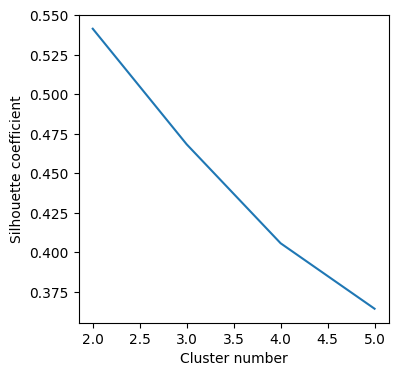

In [ ]:
#loading the necessay libraries
from sklearn.cluster import KMeans
from sklearn import metrics
#a dataset is selected for the clustering task, including 3 attributes from the normalized dataset
clustering_dataset = my_working_dataset[['culmen_length_mm','culmen_depth_mm','flipper_length_mm']]
#Creating a list of silhouette coefficient values
Silhouette_coefficient = []
#a loop with 6 iterations is implemented (6 different values for the number of clusters)
# 1 cluster is not considered in this case because it is not meaningful to calculate the silhouette coefficient for 1 cluster
for i in range(2,6):
   #Creation of a K-means clustering model where the number of clusters (n_clusters) is equal to the loop iteration number (2, 3..) 
   kmeans_model = KMeans(n_clusters = i, init = "k-means++")
   #training of K-means model
   kmeans_model.fit(clustering_dataset)
   #Calculating the Silhouette coeffcient
   Silhouette_coefficient.append(metrics.silhouette_score(clustering_dataset, kmeans_model.labels_))
print(Silhouette_coefficient)
#representing the results visually
plt.figure(figsize=(4,4))
plt.plot(range(2,6), Silhouette_coefficient)
plt.xlabel('Cluster number')
plt.ylabel('Silhouette coefficient')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


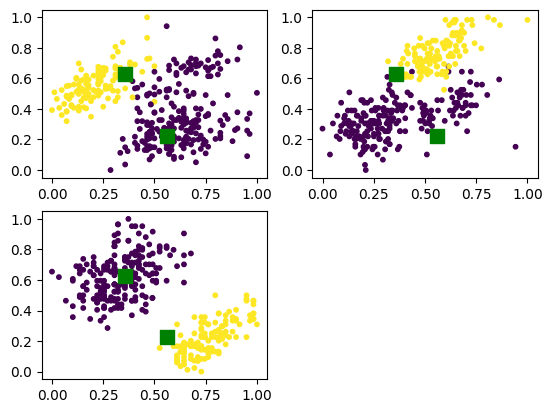

In [ ]:
#an additonal libary is added to represent the results of clustering
import matplotlib.pyplot as plt
#a K-means model with 2 clusters is created and trained using the dataset with 3 features
kmeans_model = KMeans(n_clusters=2, init = "k-means++").fit(clustering_dataset)
#acquiring cluster centers
centroids = kmeans_model.cluster_centers_
#make predictions for cluster membership of data objects
y_pred = kmeans_model.predict(clustering_dataset)
plt.subplot(2,2,1)                            # A 2 x 2 matrix of images is created, index starting with 1 in the top left corner
plt.scatter(clustering_dataset['culmen_depth_mm'], clustering_dataset['culmen_length_mm'], s = 10, c = y_pred)
plt.scatter(centroids[0,0], centroids[0,1], s = 100, c = 'g', marker = 's')
plt.scatter(centroids[1,0], centroids[1,1], s = 100, c = 'g', marker = 's')
plt.subplot(2,2,2)                            # Create the next image in the matrix with index 2
plt.scatter(clustering_dataset['culmen_length_mm'], clustering_dataset['flipper_length_mm'], s = 10, c = y_pred)
plt.scatter(centroids[0,0], centroids[0,1], s = 100, c = 'g', marker = 's')
plt.scatter(centroids[1,0], centroids[1,1], s = 100, c = 'g', marker = 's')
plt.subplot(2,2,3)                            # Create the next image in the matrix with index 3
plt.scatter(clustering_dataset['flipper_length_mm'], clustering_dataset['culmen_depth_mm'], s = 10, c = y_pred)
plt.scatter(centroids[0,0], centroids[0,1], s = 100, c = 'g', marker = 's')
plt.scatter(centroids[1,0], centroids[1,1], s = 100, c = 'g', marker = 's')
plt.show()

#Hierarchical clustering
---

In [ ]:
#an additional library is needed to use the algorithm
from sklearn.cluster import AgglomerativeClustering
#creating an algorithm model, using a datset with 3 features
clustering = AgglomerativeClustering().fit(clustering_dataset)

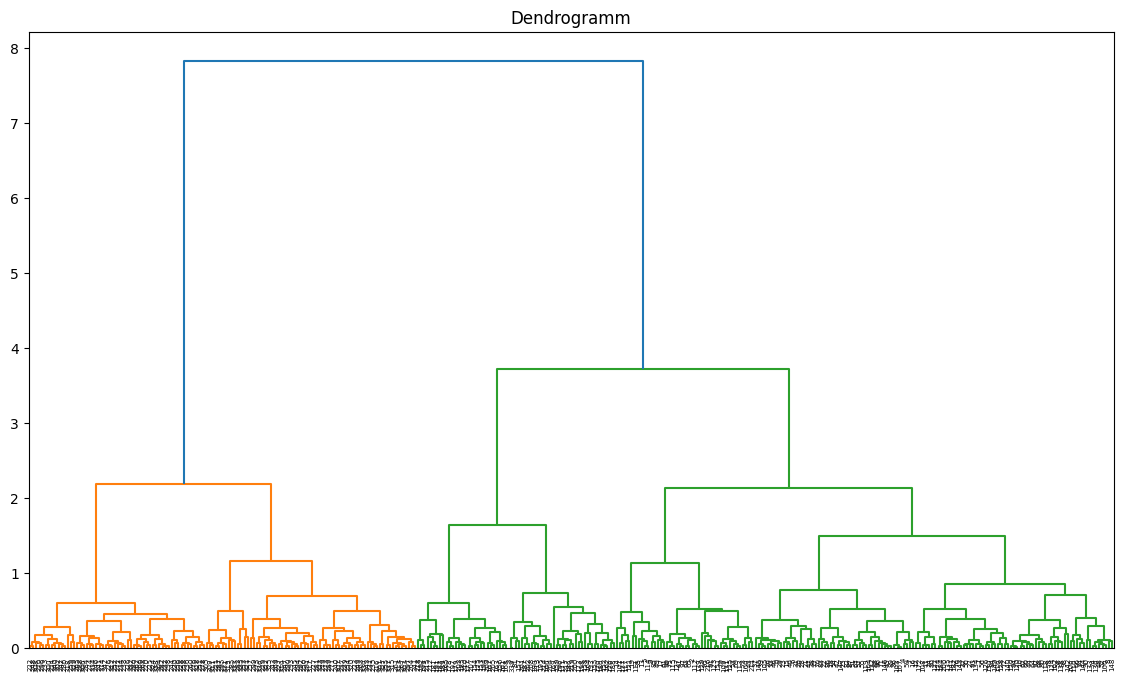

In [ ]:
#adding a library to represent a dendrogramm
import scipy.cluster.hierarchy as shc
#creating a dendrogramm using a linkage method "ward"
plt.figure(figsize =(14, 8))
plt.title('Dendrogramm')
Dendrogram = shc.dendrogram((shc.linkage(clustering_dataset, method ='ward')))

#Artificial neural networks
---

In [ ]:
#importing a library for splitting the dataset into test and training dataset
from sklearn.model_selection import train_test_split
#saving the target values of the data objects, i.e. "penguin species", in a separate variable
targets = my_working_dataset['species_cat']
#specifying the proportion of data objects that will form the training dataset (70%)
training_proportion = 0.7
#splitting the dataset into test and training sets using a random 70:30 split
X_train, X_test, y_train, y_test = train_test_split(clustering_dataset, targets, test_size=1.0 - training_proportion, random_state=42)

####**Model 1** - 2 layers, 100 neurons in each

In [ ]:
#importing a library to work with artificial neural networks
from sklearn.neural_network import MLPClassifier
#building an artificial neural network model with 2 layers, each containing 100 neurons
#The following parameters are set: the maximum number of training iterations is 1000, the activation function is logistic,
#the weight matching method is stochastic gradient descent, the output of training iterations
my_ann_model = MLPClassifier(hidden_layer_sizes=(100,100), max_iter=1000, activation = 'logistic', solver='sgd', learning_rate_init = 0.1, verbose = 1)
my_ann_model.fit(X_train, y_train)

Iteration 1, loss = 1.26178852
Iteration 2, loss = 1.11117418
Iteration 3, loss = 1.08680855
Iteration 4, loss = 1.06401539
Iteration 5, loss = 1.13479708
Iteration 6, loss = 1.05327870
Iteration 7, loss = 1.05502210
Iteration 8, loss = 1.06816821
Iteration 9, loss = 1.05546096
Iteration 10, loss = 1.06291964
Iteration 11, loss = 1.07230295
Iteration 12, loss = 1.07937777
Iteration 13, loss = 1.06130905
Iteration 14, loss = 1.05625479
Iteration 15, loss = 1.07707599
Iteration 16, loss = 1.05499142
Iteration 17, loss = 1.09085233
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 100),
              learning_rate_init=0.1, max_iter=1000, solver='sgd', verbose=1)

              precision    recall  f1-score   support

           0       0.48      1.00      0.65        50
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00        34

    accuracy                           0.48       104
   macro avg       0.16      0.33      0.22       104
weighted avg       0.23      0.48      0.31       104



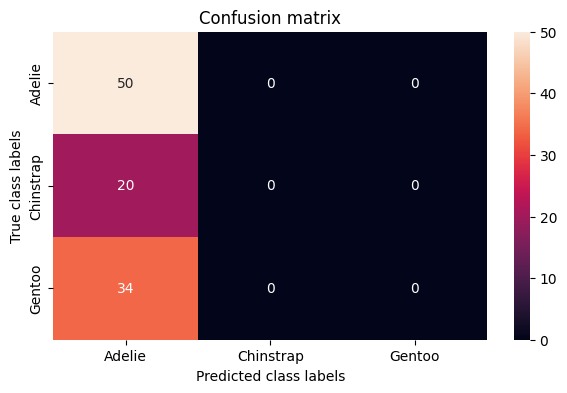

In [ ]:
#importing libraries for acquiring and representing performance metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import pylab as pltb
#we use the trained model with a test set to obtain predictions
y_predictions = my_ann_model.predict(X_test)
#displaying metrics
print(classification_report(y_test,y_predictions, zero_division=0))
#creating a confusion matrix
my_confusion_matrix = confusion_matrix(y_test, y_predictions)
#displaying the confusion matrix
fig, ax = pltb.subplots(figsize=(7,4))
sns.heatmap(my_confusion_matrix, annot = True, fmt = 'g', ax = ax);
ax.set_xlabel('Predicted class labels');
ax.set_ylabel('True class labels');
ax.set_title('Confusion matrix');
ax.xaxis.set_ticklabels(my_dataset['species'].unique());
ax.yaxis.set_ticklabels(my_dataset['species'].unique());

The confusion matrix shows that 54 data objects were misclassified, so the overall accuracy of the network is quite low at 48%.

####**Model 2** - 1 layer, 5 neurons 

In [ ]:
#building an artificial neural network model with 1 layer and 5 neurons in it
#The following parameters are set: the maximum number of training iterations is 50, the activation function is logistic,
#the weight matching method is stochastic gradient descent, the output of training iterations
my_ann_model_2 = MLPClassifier(hidden_layer_sizes=(5), max_iter=50, activation = 'logistic', solver='sgd', learning_rate_init = 0.2, verbose = 0)
my_ann_model_2.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=5,
              learning_rate_init=0.2, max_iter=50, solver='sgd', verbose=0)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        50
           1       0.94      0.80      0.86        20
           2       0.97      1.00      0.99        34

    accuracy                           0.95       104
   macro avg       0.95      0.93      0.94       104
weighted avg       0.95      0.95      0.95       104



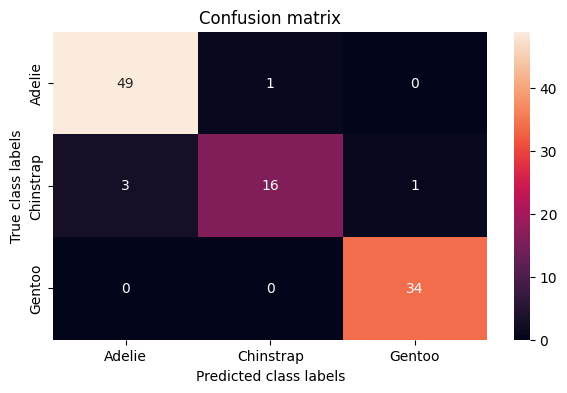

In [ ]:
#we use the trained model with a test set to obtain predictions
y_predictions_2 = my_ann_model_2.predict(X_test)
#displaying metrics
print(classification_report(y_test,y_predictions_2, zero_division=0))
#creating a confusion matrix
my_confusion_matrix = confusion_matrix(y_test, y_predictions_2)
#displaying the confusion matrix
fig, ax = pltb.subplots(figsize=(7,4))
sns.heatmap(my_confusion_matrix, annot = True, fmt = 'g', ax = ax);
ax.set_xlabel('Predicted class labels');
ax.set_ylabel('True class labels');
ax.set_title('Confusion matrix');
ax.xaxis.set_ticklabels(my_dataset['species'].unique());
ax.yaxis.set_ticklabels(my_dataset['species'].unique());

#kNN algoritms
---

In [ ]:
#importing a library to use the algorithm
from sklearn.neighbors import KNeighborsClassifier
#a model with 5 neighbours is created
KNN_MODEL = KNeighborsClassifier(n_neighbors=5)
#Feed the training dataset to the model
KNN_MODEL.fit(X_train, y_train)

KNeighborsClassifier()

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        50
           1       0.90      0.95      0.93        20
           2       1.00      1.00      1.00        34

    accuracy                           0.97       104
   macro avg       0.96      0.97      0.97       104
weighted avg       0.97      0.97      0.97       104



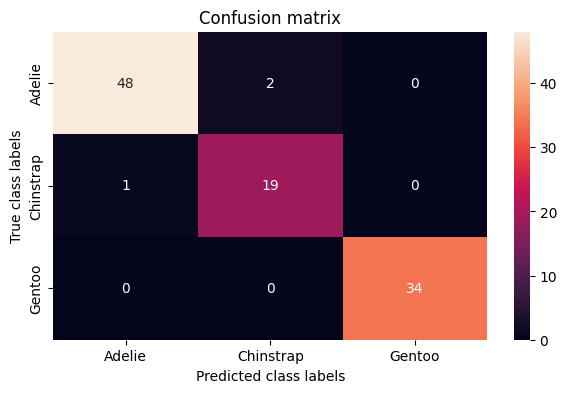

In [ ]:
#we use the trained model with a test set to obtain predictions
y_predictions_knn = KNN_MODEL.predict(X_test)
#displaying metrics
print(classification_report(y_test,y_predictions_knn, zero_division=0))
#creating a confusion matrix
my_confusion_matrix = confusion_matrix(y_test, y_predictions_knn)
#displaying the confusion matrix
fig, ax = pltb.subplots(figsize=(7,4))
sns.heatmap(my_confusion_matrix, annot = True, fmt = 'g', ax = ax);
ax.set_xlabel('Predicted class labels');
ax.set_ylabel('True class labels');
ax.set_title('Confusion matrix');
ax.xaxis.set_ticklabels(my_dataset['species'].unique());
ax.yaxis.set_ticklabels(my_dataset['species'].unique());